# Multi linear regression
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

#### Data Description

* R&D Spend -- Research and devolop spend in the past few years
* Administration -- spend on administration in the past few years
* Marketing Spend -- spend on Marketing in the past few years
* State -- states from which data is collected
* Profit  -- profit of each state in the past few years

### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### EDA

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


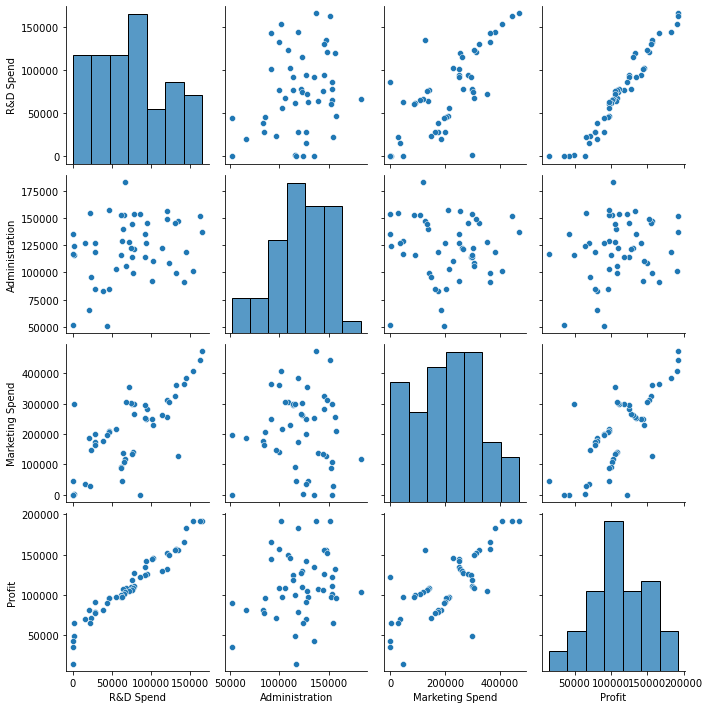

In [7]:
sns.pairplot(df)

<AxesSubplot:>

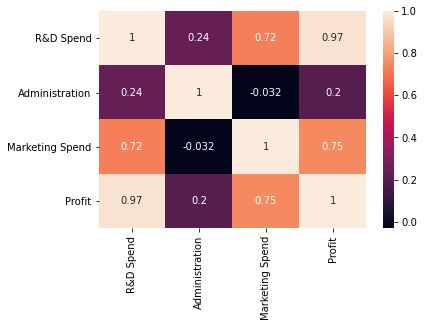

In [8]:
sns.heatmap(df.corr(), annot=True)

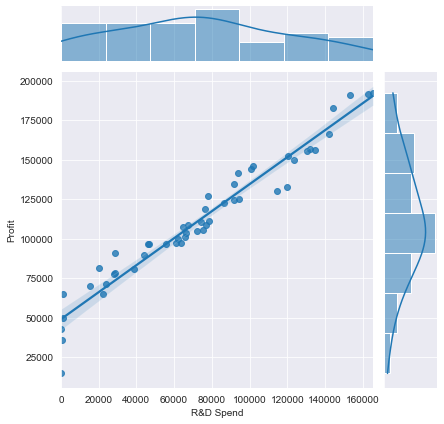

In [50]:
sns.jointplot(x='R&D Spend',y='Profit',data=df,kind='reg') #regression plot

<AxesSubplot:xlabel='State', ylabel='Profit'>

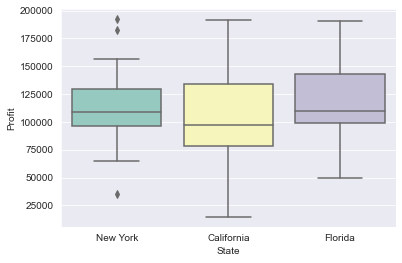

In [10]:
sns.set_style('darkgrid')
sns.boxplot(y=df['Profit'],x=df['State'], palette='Set3')

<AxesSubplot:xlabel='State', ylabel='R&D Spend'>

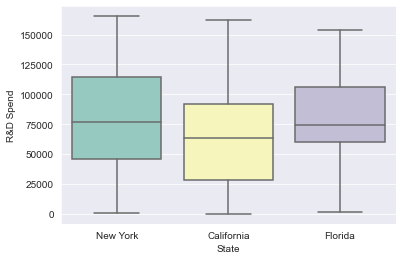

In [54]:
sns.boxplot(y=df['R&D Spend'],x=df['State'], palette='Set3')

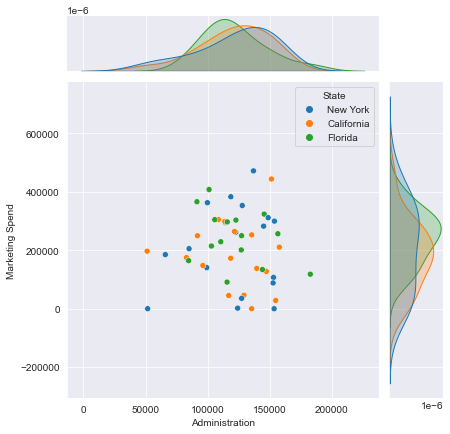

In [53]:
sns.jointplot(x='Administration', y='Marketing Spend', data=df, hue='State') 

In [11]:
# One Hot Encoding

df1 = pd.get_dummies(df, drop_first=True)
df1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [12]:
X = df1.drop('Profit', axis=1)
y = df1['Profit']

### Transformations and Model Building

In [41]:
# Square root transformation on independent variables
X_sqrt = pd.concat([np.sqrt(X.iloc[:,:-2]), X.iloc[:,-2:]], axis=1)

model1 = LinearRegression()
model1.fit(X_sqrt,y)
model1.score(X_sqrt,y)

0.9085136338382949

In [42]:
# Square root transformation on dependent variables
y_sqrt = np.sqrt(y)

model1 = LinearRegression()
model1.fit(X,y_sqrt)
model1.score(X,y_sqrt)

0.8961621323832625

In [43]:
# Square root transformation on independent nad dependent variables
X_sqrt = np.sqrt(X)
y_sqrt = np.sqrt(y)

model1 = LinearRegression()
model1.fit(X_sqrt,y_sqrt)
model1.score(X_sqrt,y_sqrt)

0.9312862332501144

In [44]:
# Log transformation on dependent variables
y_log = np.log(y)

model1 = LinearRegression()
model1.fit(X,y_log)
model1.score(X,y_log)

0.7652217658198619

In [56]:
# no transformation
model = LinearRegression()
model.fit(X,y)

LinearRegression()

### Prediction and Evaluation

In [57]:
pred = pd.DataFrame(columns=['Actual','Predicted'])

pred['Predicted'] = model.predict(X)
pred['Actual'] = df1['Profit']
pred['Error'] = pred['Actual'] - pred['Predicted']

pred.head(3)

,Actual,Predicted,Error
0,192261.83,192390.571363,-128.741363
1,191792.06,189071.320105,2720.739895
2,191050.39,182276.186733,8774.203267


In [58]:
metrics.r2_score(pred['Actual'], pred['Predicted']) #model with the best r squared value

0.9507524843355148

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

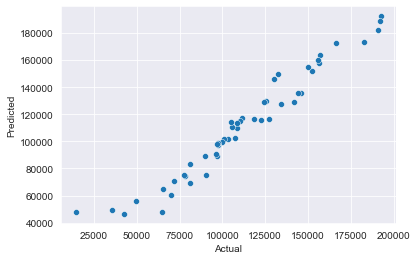

In [59]:
sns.scatterplot(x=pred['Actual'], y=pred['Predicted'])

<AxesSubplot:>

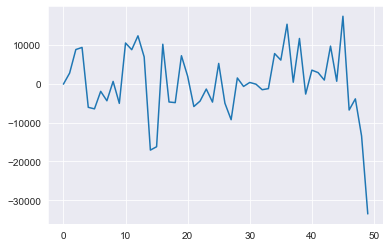

In [66]:
pred['Error'].plot()

Thank you!